In [14]:
import keras
keras.__version__

'2.2.5'

In [15]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers 
import tensorflow.keras.optimizers as optimizers

from keras.datasets import cifar10
from keras.utils import to_categorical

import numpy as np

In [17]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

validation_images = train_images[40000:]
validation_labels = train_labels[40000:]

train_images = train_images[:40000]
train_labels = train_labels[:40000]

train_images = train_images.reshape((40000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

validation_images = validation_images.reshape((10000, 32, 32, 3))
validation_images = validation_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
validation_labels = to_categorical(validation_labels)
test_labels = to_categorical(test_labels)

print("Training set: images {:}\tlabels: {:}".format(train_images.shape, train_labels.shape ) )
print("validation set: images {:}\tlabels: {:}".format(validation_images.shape, validation_labels.shape ) )
print("Test set: images {:}\tlabels: {:}".format(test_images.shape, test_labels.shape ) )

Training set: images (40000, 32, 32, 3)	labels: (40000, 10)
validation set: images (10000, 32, 32, 3)	labels: (10000, 10)
Test set: images (10000, 32, 32, 3)	labels: (10000, 10)


In [18]:
from tensorflow.keras.applications import VGG19

conv_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))

conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [19]:
model = models.Sequential()

model.add(conv_base)
conv_base.trainable = False

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=5e-4), 
              loss='categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [20]:
model_hist = model.fit(train_images, train_labels,
                    epochs=60,
                    batch_size=1024,
                    validation_data=(validation_images, validation_labels))

Train on 40000 samples, validate on 10000 samples
Epoch 1/60
40000/40000 [==============================] - 5s 114us/sample - loss: 2.1595 - acc: 0.2072 - val_loss: 1.8082 - val_acc: 0.3913
Epoch 2/60
40000/40000 [==============================] - 4s 104us/sample - loss: 1.8577 - acc: 0.3265 - val_loss: 1.6148 - val_acc: 0.4279
Epoch 3/60
40000/40000 [==============================] - 4s 105us/sample - loss: 1.7166 - acc: 0.3785 - val_loss: 1.5037 - val_acc: 0.4680
Epoch 4/60
40000/40000 [==============================] - 4s 104us/sample - loss: 1.6320 - acc: 0.4193 - val_loss: 1.4445 - val_acc: 0.4882
Epoch 5/60
40000/40000 [==============================] - 4s 105us/sample - loss: 1.5793 - acc: 0.4398 - val_loss: 1.4267 - val_acc: 0.4927
Epoch 6/60
40000/40000 [==============================] - 4s 105us/sample - loss: 1.5295 - acc: 0.4621 - val_loss: 1.3852 - val_acc: 0.5042
Epoch 7/60
40000/40000 [==============================] - 4s 105us/sample - loss: 1.4975 - acc: 0.4771 - val_l

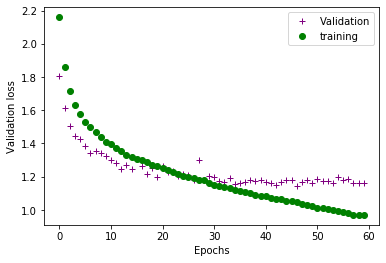

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model_hist.history['loss']
val_loss= model_hist.history['val_loss']

epochs_val = range(0, len(train_loss))
epochs = range(0, len(train_loss))

plt.plot(epochs_val, val_loss, 'b+', label='Validation', c = 'purple')
plt.plot(epochs, train_loss, 'bo', label='training', c ='green')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [0]:
model.save_weights('savedbase.h5')
#od tego momentu - nowe eksperymenty

model.compile(optimizer=optimizers.RMSprop(lr=1e-4), 
              loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [23]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1' or layer.name == 'block5_conv2' or layer.name == 'block5_conv3' :
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model_hist = model.fit(train_images, train_labels,
                    epochs=50,
                    batch_size=1024,
                    validation_data=(validation_images, validation_labels))

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 5s 113us/sample - loss: 0.9277 - acc: 0.6839 - val_loss: 1.1174 - val_acc: 0.6191
Epoch 2/50
40000/40000 [==============================] - 4s 104us/sample - loss: 0.9068 - acc: 0.6890 - val_loss: 1.1213 - val_acc: 0.6182
Epoch 3/50
40000/40000 [==============================] - 4s 104us/sample - loss: 0.9018 - acc: 0.6921 - val_loss: 1.1257 - val_acc: 0.6196
Epoch 4/50
40000/40000 [==============================] - 4s 104us/sample - loss: 0.9009 - acc: 0.6917 - val_loss: 1.1247 - val_acc: 0.6179
Epoch 5/50
40000/40000 [==============================] - 4s 104us/sample - loss: 0.8943 - acc: 0.6968 - val_loss: 1.1268 - val_acc: 0.6181
Epoch 6/50
40000/40000 [==============================] - 4s 104us/sample - loss: 0.8900 - acc: 0.6959 - val_loss: 1.1296 - val_acc: 0.6186
Epoch 7/50
40000/40000 [==============================] - 4s 104us/sample - loss: 0.8976 - acc: 0.6942 - val_l

In [24]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block4_conv1' or layer.name == 'block4_conv2' or layer.name == 'block4_conv3' :
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model_hist = model.fit(train_images, train_labels,
                    epochs=50,
                    batch_size=1024,
                    validation_data=(validation_images, validation_labels))

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 4s 103us/sample - loss: 0.8162 - acc: 0.7198 - val_loss: 1.1479 - val_acc: 0.6211
Epoch 2/50
40000/40000 [==============================] - 4s 103us/sample - loss: 0.8140 - acc: 0.7212 - val_loss: 1.1573 - val_acc: 0.6217
Epoch 3/50
40000/40000 [==============================] - 4s 104us/sample - loss: 0.8192 - acc: 0.7215 - val_loss: 1.1498 - val_acc: 0.6226
Epoch 4/50
40000/40000 [==============================] - 4s 103us/sample - loss: 0.8120 - acc: 0.7212 - val_loss: 1.1517 - val_acc: 0.6249
Epoch 5/50
40000/40000 [==============================] - 4s 104us/sample - loss: 0.8097 - acc: 0.7243 - val_loss: 1.1551 - val_acc: 0.6195
Epoch 6/50
40000/40000 [==============================] - 4s 104us/sample - loss: 0.8088 - acc: 0.7249 - val_loss: 1.1532 - val_acc: 0.6205
Epoch 7/50
40000/40000 [==============================] - 4s 104us/sample - loss: 0.8105 - acc: 0.7229 - val_l

In [25]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1' or layer.name == 'block5_conv2' or layer.name == 'block5_conv3' :
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model_hist = model.fit(train_images, train_labels,
                    epochs=50,
                    batch_size=1024,
                    validation_data=(validation_images, validation_labels))

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 4s 104us/sample - loss: 0.7495 - acc: 0.7428 - val_loss: 1.1775 - val_acc: 0.6245
Epoch 2/50
40000/40000 [==============================] - 4s 103us/sample - loss: 0.7475 - acc: 0.7437 - val_loss: 1.1839 - val_acc: 0.6211
Epoch 3/50
40000/40000 [==============================] - 4s 103us/sample - loss: 0.7505 - acc: 0.7418 - val_loss: 1.1801 - val_acc: 0.6232
Epoch 4/50
40000/40000 [==============================] - 4s 104us/sample - loss: 0.7494 - acc: 0.7452 - val_loss: 1.1762 - val_acc: 0.6240
Epoch 5/50
40000/40000 [==============================] - 4s 103us/sample - loss: 0.7479 - acc: 0.7442 - val_loss: 1.1790 - val_acc: 0.6226
Epoch 6/50
40000/40000 [==============================] - 4s 103us/sample - loss: 0.7456 - acc: 0.7477 - val_loss: 1.1841 - val_acc: 0.6209
Epoch 7/50
40000/40000 [==============================] - 4s 104us/sample - loss: 0.7488 - acc: 0.7452 - val_l



```
## Final ...
```



In [26]:
conv_base.trainable = False

model_hist = model.fit(train_images, train_labels,
                    epochs=50,
                    batch_size=1024,
                    validation_data=(validation_images, validation_labels))

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 4s 107us/sample - loss: 0.7004 - acc: 0.7611 - val_loss: 1.2126 - val_acc: 0.6202
Epoch 2/50
40000/40000 [==============================] - 4s 106us/sample - loss: 0.6914 - acc: 0.7617 - val_loss: 1.2150 - val_acc: 0.6222
Epoch 3/50
40000/40000 [==============================] - 4s 106us/sample - loss: 0.6919 - acc: 0.7624 - val_loss: 1.2145 - val_acc: 0.6207
Epoch 4/50
40000/40000 [==============================] - 4s 106us/sample - loss: 0.6901 - acc: 0.7659 - val_loss: 1.2127 - val_acc: 0.6197
Epoch 5/50
40000/40000 [==============================] - 4s 105us/sample - loss: 0.6985 - acc: 0.7633 - val_loss: 1.2134 - val_acc: 0.6186
Epoch 6/50
40000/40000 [==============================] - 4s 106us/sample - loss: 0.6877 - acc: 0.7667 - val_loss: 1.2175 - val_acc: 0.6207
Epoch 7/50
40000/40000 [==============================] - 4s 106us/sample - loss: 0.6900 - acc: 0.7628 - val_l

In [0]:
model.save_weights('final_tuning.h5')

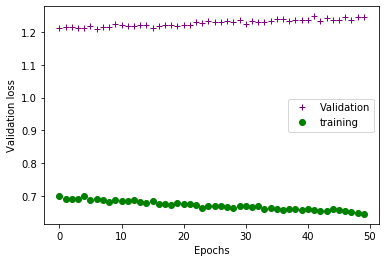

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model_hist.history['loss']
val_loss= model_hist.history['val_loss']

epochs_val = range(0, len(train_loss))
epochs = range(0, len(train_loss))

plt.plot(epochs_val, val_loss, 'b+', label='Validation', c = 'purple')
plt.plot(epochs, train_loss, 'bo', label='training', c ='green')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [0]:
model.load_weights('final_tuning.h5')

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
test_loss